# Notebook 7 - Traitement Automatique des Langues (TAL)

CSI4506 Intelligence Artificielle
Automne 2020  
Preparé par Julian Templeton, Caroline Barrière et Joel Muteba

***INTRODUCTION***:  

La Covid-19 a changé notre vie quotidienne et a eu un impact mondial. Une grande partie de ce qui se passe dans le monde nous est rapportée par les nouvelles, sous forme de texte.

Dans ce notebook, nous allons exécuter des techniques de Traitement Automatique des Langues sur un ensemble de données d'actualités liées à Covid-19. Nous ferons de la tokenisation, de la lemmatisation, de l'étiquetage des parties du discours (POS), de la reconnaissance d'entités nommées, de la suppression des mots vides et plus encore avec des phrases d'articles de presse et de l'ensemble de données. Vous utiliserez la bibliothèque de TAL [spaCy](https://spacy.io/) pour exécuter ces techniques TAL. Cette bibliothèque simplifie l'exécution de ces opérations complexes pour du texte dans une langue spécifiée.

Cela vous permettra d'explorer la pipeline TAL et d'analyser le contenu du texte dans l'ensemble de données. Vous allez également créer des nuages de mots basés sur le texte modifié de l'ensemble de données. Cela nous permettra de visualiser les mots clés des articles afin de mieux comprendre quel contenu y est le plus important.

Pour ce notebook, vous devrez installer les packages suivants en plus des bibliothèques précédemment utilisées:     
1) [spaCy](https://spacy.io/usage): pip install -U spacy      
2) spaCy's English package (change the command according to your environment, ex: python vs py): py -m spacy download en          
3) [WordCloud](https://amueller.github.io/word_cloud/): pip install wordcloud      
4) MultiDict: pip install multidict     

**Note:** Pour certains étudiants qui ont déjà installé spaCy, un problème peut survenir en essayant de travailler avec le package anglais mentionné dans (2). Si cela se produit, il existe une ligne de code commentée avec une autre façon d'exécuter la même méthode. Seulement si vous rencontrez un problème où «en» n'est pas reconnu, exécutez la commande pip suivante et basculez la fonction spacy.load() dans la deuxième cellule de code ci-dessous sur l'appel commenté.
Changez la commande en fonction de votre environnement, ex: python vs py: py -m spacy download en_core_web_sm

***DEVOIR***:  
Parcourez le notebook en exécutant chaque cellule, une à la fois.
Recherchez **(À FAIRE)** pour les tâches que vous devez effectuer. Ne modifiez pas le code en dehors des questions auxquelles vous êtes invité à répondre à moins que cela ne vous soit spécifiquement demandé. Une fois que vous avez terminé, signez le notebook (à la fin du notebook) et soumettez-le.

*Le notebook sera noté sur 25.
Chaque **(TO DO)** est associé à un certain nombre de points.*
***

In [3]:
# Before starting we will import every module that we will be using

import matplotlib.pyplot as plt
import multidict as multidict
import re
import spacy
from spacy import displacy
from wordcloud import WordCloud
import pandas as pd


In [4]:
# The core spacy object that will be used for tokenization, lemmatization, POS Tagging, ...
# Note that this is specifically for the English language and requires the English package to be installed
# via pip to work as intended.

#sp = spacy.load('en')

# If the above causes an error after installing the package described in (2), install the package described
# in the Note section within the introduction and run this line of code instead of the above.
sp = spacy.load('en_core_web_sm')



**PARTIE 1 - Analyse des phrases**  

Dans cette partie, nous utiliserons les modules de * spaCy * pour effectuer les différentes étapes du pipeline TAL sur des phrases du fichier inclus sur les articles de presse liés à la Covid-19 provenant de CBC. L'ensemble de données est inclus avec cette soumission, mais les détails le concernant peuvent être trouvés [ici](https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26?select=news.csv). La première chose que nous allons faire est de charger le fichier dans un dataframe pandas.

In [5]:
# Read the dataset, show top ten rows
df = pd.read_csv("news.csv")
df.head(10)

Unnamed: 0                                            authors  \
0          0                                                 []   
1          1                                                 []   
2          2                             ['The Canadian Press']   
3          3                                                 []   
4          4                                                 []   
5          5  ['Senior Writer', 'Chris Arsenault Is A Senior...   
6          6                                       ['Cbc News']   
7          7                                       ['Cbc News']   
8          8  ['Senior Writer', "Adam Miller Is Senior Digit...   
9          9                                ['Thomson Reuters']   

                                               title      publish_date  \
0  'More vital now:' Gay-straight alliances go vi...   2020-05-03 1:30   
1  Scientists aim to 'see' invisible transmission...   2020-05-02 8:00   
2  Coronavirus: What's happening in Canada and ar...  2020-05-02 11:28   
3  B.C. announces 26 new coronavirus cases, new c...  2020-05-02 18:45   
4  B.C. announces 26 new coronavirus cases, new c...  2020-05-02 18:45   
5  Brazil has the most confirmed COVID-19 cases i...   2020-05-02 8:00   
6   The latest on the coronavirus outbreak for May 1  2020-05-01 20:43   
7  Coronavirus: What's happening in Canada and ar...  2020-05-01 11:51   
8  Did the WHO mishandle the global coronavirus p...   2020-04-30 8:00   
9  Armed people in Michigan's legislature protest...  2020-04-30 21:37   

                                         description  \
0  Lily Overacker and Laurell Pallot start each g...   
1  Some researchers aim to learn more about how t...   
2  Canada's chief public health officer struck an...   
3  B.C. provincial health officer Dr. Bonnie Henr...   
4  B.C. provincial health officer Dr. Bonnie Henr...   
5  From describing coronavirus as a "little flu,"...   
6  The latest on the coronavirus outbreak from CB...   
7  Nova Scotia announced Friday it is immediately...   
8  The World Health Organization has come under f...   
9  Hundreds of protesters, some armed, gathered a...   

                                                text  \
0  Lily Overacker and Laurell Pallot start each g...   
1  This is an excerpt from Second Opinion, a week...   
2  The latest:  The lives behind the numbers: Wha...   
3  B.C. provincial health officer Dr. Bonnie Henr...   
4  B.C. provincial health officer Dr. Bonnie Henr...   
5  With infection rates spiralling, some big city...   
6    Coronavirus Brief (CBC)  Canada is officiall...   
7  The latest:  The lives behind the numbers: Wha...   
8  The World Health Organization has come under f...   
9  Hundreds of protesters, some armed, gathered a...   

                                                 url  
0  https://www.cbc.ca/news/canada/calgary/gay-str...  
1  https://www.cbc.ca/news/technology/droplet-tra...  
2  https://www.cbc.ca/news/canada/coronavirus-cov...  
3  https://www.cbc.ca/news/canada/british-columbi...  
4  https://www.cbc.ca/news/canada/british-columbi...  
5  https://www.cbc.ca/news/world/brazil-has-the-m...  
6  https://www.cbc.ca/news/the-latest-on-the-coro...  
7  https://www.cbc.ca/news/canada/coronavirus-cov...  
8  https://www.cbc.ca/news/health/coronavirus-who...  
9  https://www.cbc.ca/news/world/protesters-michi...

À partir de cet ensemble de données, nous commencerons par extraire cinq phrases différentes que nous utiliserons tout au long de cette section. Tout d'abord, nous afficherons le texte d'un article et copierons manuellement les phrases qui seront utilisées pour cette section. Notez que de nombreuses balises sont enregistrées dans l'ensemble de données, mais nous ne nous en soucierons pas pour le moment.

In [12]:

c = df["text"][1]
print(c)
content = sp(c)
for token in content :
    if token.text == "N-95" :
        print(token.text + " is a " + token.pos_)

This is an excerpt from Second Opinion, a weekly roundup of eclectic and under-the-radar health and medical science news emailed to subscribers every Saturday morning. If you haven't subscribed yet, you can do that by clicking here.  The coronavirus that causes COVID-19 spreads through droplets that we spew as we breathe, talk, cough and sneeze — so tiny that they're invisible to the naked eye.  That's why questions remain about the virus's transmission and what precautions need to be taken to curb its spread as governments begin to lift restrictions. Will it help if everyone wears a mask? Is keeping everyone two metres apart far enough? Some researchers aim to learn more about transmission by trying to make invisible sneezes, coughs and breaths more visible. Here's a closer look at that research and what it might reveal. How do scientists think COVID-19 is transmitted? According to the World Health Organization, the disease spreads primarily through tiny droplets expelled when a perso

N-95 is a NUM


À partir de ce texte, nous sélectionnerons une phrase qui sera utilisée par les exemples fournis dans le notebook, *sentence_example*, et cinq phrases que vous utiliserez pour répondre à cinq questions dans cette section, *sentence1*, ... *sentence5*. Les phrases 4 et 5 sont les mêmes car cette phrase est idéale pour les deux questions.

In [130]:
# Sentence to be used for running examples
sentence_example = "Government guidelines in Canada recommend that people stay at least two metres away from others as part of physical distancing measures to curb the spread of COVID-19."
# Sentences to be used for future questions
sentence1 = "I think those are provocative and those are hypothesis- generating, but then they need to be tested in the field.\" Loeb is running such a field test himself — a randomized controlled trial of the use of medical versus N95 masks among health care workers to see if there is a difference in the transmission of COVID-19."
sentence2 = "The World Health Organization recommends that people wear masks if they are coughing and sneezing or if they are caring for someone who is sick."
sentence3 = "Will it help if everyone wears a mask?"
sentence4 = "Infection control guidelines do recommend extra personal protective equipment (including N-95 respirators) to protect against airborne transmission for healthcare workers performing procedures that generate high concentrations of aerosolized particles, such as intubations, on COVID-19 patients, McGeer said."
sentence5 = "Infection control guidelines do recommend extra personal protective equipment (including N-95 respirators) to protect against airborne transmission for healthcare workers performing procedures that generate high concentrations of aerosolized particles, such as intubations, on COVID-19 patients, McGeer said."

Avec les phrases que nous allons utiliser, nous allons maintenant explorer comment spaCy peut être appliqué sur une phrase et nous allons passer par des exemples de son utilisation. On vous posera ensuite des questions à résoudre par vous-même avec votre compréhension des concepts du TAL, avec les exemples et avec des liens vers la documentation pertinente.

Tout d'abord, nous passerons l'exemple de phrase dans notre objet spacy *sp* pour récupérer la tokenisation, la lemmatisation, les valeurs de dépendance, les parties du discours (Part-of-speech, POS), et plus encore de la phrase. Comme vous le verrez, spaCy rend ce processus très facile.

In [131]:
# Call our spaCy object to retrieve the results of running the sentence through the NLP Pipeline
# Note that we can reuse the sp variable without redefining it.
sentence_example_content = sp(sentence_example)
for token in sentence_example_content:
    print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)
# We will take a look at the dependency tree to view how the words relate to each other
displacy.render(sentence_example_content, style="dep")

Text: Government Lemma: government POS: NOUN Dependency: compound
Text: guidelines Lemma: guideline POS: NOUN Dependency: nsubj
Text: in Lemma: in POS: ADP Dependency: prep
Text: Canada Lemma: Canada POS: PROPN Dependency: pobj
Text: recommend Lemma: recommend POS: VERB Dependency: ROOT
Text: that Lemma: that POS: SCONJ Dependency: mark
Text: people Lemma: people POS: NOUN Dependency: nsubj
Text: stay Lemma: stay POS: VERB Dependency: ccomp
Text: at Lemma: at POS: ADV Dependency: advmod
Text: least Lemma: least POS: ADV Dependency: advmod
Text: two Lemma: two POS: NUM Dependency: nummod
Text: metres Lemma: metre POS: NOUN Dependency: npadvmod
Text: away Lemma: away POS: ADV Dependency: advmod
Text: from Lemma: from POS: ADP Dependency: prep
Text: others Lemma: other POS: NOUN Dependency: pobj
Text: as Lemma: as POS: SCONJ Dependency: prep
Text: part Lemma: part POS: NOUN Dependency: pobj
Text: of Lemma: of POS: ADP Dependency: prep
Text: physical Lemma: physical POS: ADJ Dependency: am

Dans le code ci-dessus, nous voyons que nous sommes en mesure d'accéder aux balises de l'arborescence de dépendances pour chaque token en appelant *.dep_*. Cependant, nous pouvons aussi directement accéder aux éléments de l'arbre de dépendances (comme vu dans le code ci-dessous). Pour plus d'exemples sur la façon de naviguer dans les arbres de dépendances, vous pouvez jeter un œil à [quelques exemples officiels de spaCy](https://spacy.io/usage/linguistic-features#dependency-parse). Cependant, vous trouverez ci-dessous des détails suffisants à connaître pour ce notebook.

En regardant l'arbre de dépendances ci-dessus, nous voyons que les mots ont des flèches pour représenter les relations. Chacun d'entre eux a un onglet de dépendance pour expliquer les dépendances entre les jetons (tokens). Par exemple, «gouvernement» est un composé du substantif du nom «directives». Ainsi, «directives gouvernementales» est un nom composé.

Dans le code, après avoir analysé et divisé le texte avec spaCy en tokens, il est possible d'accéder aux mots auxquels un token est connecté par des flèches. Ceci est présenté dans le code ci-dessous.

Notez que lors de l'accès à un nœud enfant, vous pouvez accéder aux propriétés de la même manière que vous le feriez pour un token spaCy classique (.pos_, ...).

In [132]:
# Display how to access the dependency children within a dependency tree
for token in sentence_example_content:
    print("Current token: " + token.text)
    print("All children of this token:", list(token.children))
    print("Left children of this token:", list(token.lefts))
    print("Right children of this token:", list(token.rights))
    print()

Current token: Government
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: guidelines
All children of this token: [Government, in]
Left children of this token: [Government]
Right children of this token: [in]

Current token: in
All children of this token: [Canada]
Left children of this token: []
Right children of this token: [Canada]

Current token: Canada
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: recommend
All children of this token: [guidelines, stay, .]
Left children of this token: [guidelines]
Right children of this token: [stay, .]

Current token: that
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: people
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: stay
All children of this token: [that, people, away, as]
Left children o

Nous pouvons également utiliser *sp* pour récupérer les balises de reconnaissance d'entités nommées (Named Entity Recognition, NER) des termes dans un texte fourni. Ci-dessous, nous utilisons les résultats obtenus ci-dessus après avoir appelé spaCy pour récupérer les balises NER pour chaque token de la phrase à laquelle une balise NER a été attribuée. On y accède en appelant *.label_* sur un élément de l'itération retournée, en appelant *.ents* sur les résultats renvoyés par spaCy.

In [133]:
# Loop through all tokens that contain a NER tag and print the token along with the corresponding NER tag
for token in sentence_example_content.ents:
    print("\"" + token.text + "\" is a " + token.label_ )

"Canada" is a GPE
"at least two metres" is a QUANTITY


Nous explorerons la reconnaissance d'entités nommées dans le prochain notebook, car celui-ci se concentre sur l'analyse linguistique au niveau des phrases et du corpus.

**(TO DO) Q1 - 1 point**  
For *sentence1*, utilisez spaCy pour exécuter la phrase à travers de la pipeline TAL et déterminer le nombre de tokens dans la phrase.

In [134]:
# TODO: How many tokens
sentence1_content = sp(sentence1)
length1 = 0;
for token in sentence1_content:
    length1 = length1 + 1


print(length1)

61


**(TO DO) Q2 - 2 points**  
Pour *sentence2*, afficher l'arborescence des dépendances et déterminer quel est le sujet du verbe *recommande* (le nom complet). Vous n'avez pas besoin de le faire automatiquement, imprimez simplement la valeur que vous trouvez en regardant l'arborescence des dépendances.

In [135]:
# Display the dependency tree for sentence5
sentence2_content = sp(sentence2)
displacy.render(sentence2_content, style="dep")
# What is the subject of the verb 'recommends' in sentence5
print("The subject of the verb 'recommends' is 'The World Health Organization'")

The subject of the verb 'recommends' is 'The World Health Organization'


**(TO DO) Q3 - 2 points**  
Pour *sentence3*, utilisez spaCy pour exécuter la phrase dans la pipeline TAL et n'imprimez que les mots qui sont des verbes (*VERB*).

In [136]:
# TODO: Find the verbs
sentence3_content = sp(sentence3)
for token in sentence3_content:
    if token.pos_ == "VERB" :
        print(str(token.text))
   

Will
help
wears


**(TO DO) Q4** 

a) Pour *sentence4*, utilisez spaCy pour exécuter la phrase dans la pipeline TAL et n'imprimez que les mots qui sont des adjectifs (*ADJ*).

b) Pour chaque adjectif trouvé en (a), trouvez les noms que l'adjectif modifie. Pour ce faire, vous devrez parcourir les balises de l'arborescence de dépendances pour trouver les adjectifs avec la balise *amod* pour trouver le nom suivant qu'il modifie.

**(TO DO) Q4 (a) - 1 point**  
a) Pour *sentence4*, utilisez spaCy pour exécuter la phrase dans la pipeline TAL et n'imprimez que les mots qui sont des adjectifs (*ADJ*).

In [137]:
# TODO: Find the adjectives
s4 = sp(sentence4)
for token in s4:
    if token.pos_ == "ADJ" :
        print(str(token.text))

extra
personal
protective
airborne
high
such
COVID-19


**(TO DO) Q4 (b) - 3 points**  

b) Pour chaque adjectif applicable dans la phrase, trouvez les noms que l'adjectif modifie. Si plusieurs adjectifs modifient un seul nom, chacun de ces adjectifs doit être imprimé avec ces noms (ex: «extra -> équipement»).

Pour ce faire, vous devrez parcourir les balises de l'arborescence de dépendances pour trouver les adjectifs avec la balise *amod* pour trouver le nom suivant qu'il modifie. Notez que tous les adjectifs n'auront pas la dépendance *amod*, mais beaucoup en auront.

*Astuce*: Rappelez-vous de l'exemple au début de cette partie que vous êtes en mesure de sélectionner un token et d'accéder à chaque flèche quittant le token.

Notez également que vous pouvez aborder ce problème de plusieurs façons, alors n'hésitez pas à concevoir l'approche vous-même (à condition qu'elle réponde correctement à la question).

In [138]:
# Display the dependency tree       
displacy.render(s4, style="dep")

In [139]:
# TODO: Print the nouns that an adjective modifies with the amod dependency label
# Go through the spaCy tokens, look for a specific POS tag, find the amod relations and print the relationship
for token in s4:
    if token.dep_ == "amod" :
        print(str(token.text) + " -> " + str(token.head))

extra -> equipment
personal -> equipment
protective -> equipment
airborne -> transmission
high -> concentrations
aerosolized -> particles
such -> as


**(TO DO) Q5 - 3 points**  
Pour *sentence5*, utilisez spaCy pour exécuter la phrase à travers la pipeline TAL et trouver tous les *noms composés*. Un nom composé se compose d'un ou de plusieurs mots avec une valeur de dépendance *compound* (composée, qui sont également des noms, *NOUN*) suivie d'un nom (*compound*, ..., *compound*, *non-compound NOUN*).

Pour afficher les noms composés, vous pouvez afficher l'arborescence des dépendances de la phrase après l'avoir exécutée dans la pipeline TAL via spaCy.

Vous devez mettre les noms composés en entier pour obtenir des notes. Imprimez les noms composés obtenus.

Notez que vous pouvez aborder ce problème de plusieurs façons, alors n'hésitez pas à concevoir l'approche vous-même (tant qu'elle répond correctement à la question).

Ex: «Infection control guidelines» est un nom composé.

Ci-dessous, nous avons analysé la phrase, imprimé les noms composés et affiché l'arborescence de dépendances que vous pouvez consulter avant de coder dans la cellule suivante.

In [140]:
# Apply spaCy to sentence3
s5 = sp(sentence5)

# Display all compounds within the sentence
for token in s5:
    if token.dep_ == "compound":
        print(token)

# Display the dependency tree
displacy.render(s5, style="dep")

Infection
control
N-95
healthcare


In [141]:
# TODO: Find, connect, and print all noun compounds
noun_compounds = []
nouns =[]
for token in s5:
    if token.dep_ == "compound":
        noun_compounds.append(token)

i = 0
while i < len(noun_compounds) - 1:
    last = str(noun_compounds[i].head)
    
    n = ""
    same = True
    while same : 
        if noun_compounds[i].head == noun_compounds[i+1].head:
            n = n +  " " + str(noun_compounds[i])
            i = i + 1
        else:
            same = False
    n = n + " " + str(noun_compounds[i]) + " " + last
    nouns.append(n)
    i = i + 1
    
length = len(noun_compounds) - 1
if noun_compounds[length] != noun_compounds[length - 1]:
    nouns.append(str(noun_compounds[length]) + " " + str(noun_compounds[length].head))


print(nouns)





    
        
    # We want to find all combined compounds for a noun

    # If we received a noun compound, add it to the list
    
    
# Print the noun compounds


[' Infection control guidelines', ' N-95 respirators', 'healthcare workers']


**(TO DO) Q6 - 1 point**  

À l'aide de la phrase fournie, expliquez brièvement l'impact de la longueur sur l'arbre de dépendance d'une phrase et sur l'analyse de la phrase (via un commentaire ou une déclaration imprimée).

In [142]:
# TODO: Complete answer

sentence_parse = "In a surprisingly high turnout, millions of South Korean voters wore masks and moved slowly between lines of tape at polling stations on Wednesday to elect lawmakers in the shadow of the spreading coronavirus."
s_parse = sp(sentence_parse)
for token in s_parse:
    print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)
displacy.render(s_parse, style="dep")
# TODO: What is the impact
print("As the length of the sentence increases, so does the size of the dependency tree")

Text: In Lemma: in POS: ADP Dependency: prep
Text: a Lemma: a POS: DET Dependency: det
Text: surprisingly Lemma: surprisingly POS: ADV Dependency: advmod
Text: high Lemma: high POS: ADJ Dependency: amod
Text: turnout Lemma: turnout POS: NOUN Dependency: pobj
Text: , Lemma: , POS: PUNCT Dependency: punct
Text: millions Lemma: million POS: NOUN Dependency: nsubj
Text: of Lemma: of POS: ADP Dependency: prep
Text: South Lemma: south POS: ADJ Dependency: amod
Text: Korean Lemma: korean POS: ADJ Dependency: amod
Text: voters Lemma: voter POS: NOUN Dependency: pobj
Text: wore Lemma: wear POS: VERB Dependency: ROOT
Text: masks Lemma: mask POS: NOUN Dependency: dobj
Text: and Lemma: and POS: CCONJ Dependency: cc
Text: moved Lemma: move POS: VERB Dependency: conj
Text: slowly Lemma: slowly POS: ADV Dependency: advmod
Text: between Lemma: between POS: ADP Dependency: prep
Text: lines Lemma: line POS: NOUN Dependency: pobj
Text: of Lemma: of POS: ADP Dependency: prep
Text: tape Lemma: tape POS: NO

As the length of the sentence increases, so does the size of the dependency tree


**PARTIE 2 - Analyse du corpus**  

Pour la deuxième section de ce notebook, nous nous concentrerons sur l'analyse de l'ensemble du corpus en créant des nuages de mots basés sur le contenu du corpus. Cela nous aidera à identifier les mots clés dans les articles en fonction des critères que nous appliquons aux données avec des techniques de TAL.

Pour cette section, nous utiliserons la bibliothèque WordCloud qui nous permet de créer les nuages de mots avec du texte ou par fréquences des mots dans le texte. Le code pour générer les nuages de mots en fonction de la fréquence provient de cet [exemple WordCloud](https://amueller.github.io/word_cloud/auto_examples/frequency.html).

Nous commencerons par un exemple simple de création d'un nuage de mots basé sur les titres des documents de notre corpus. Bien que nous puissions utiliser les descriptions des aritcles ou le test réel, cela peut prendre trop de temps. Ainsi, nous travaillerons avec les titres qui permettront de générer des nuages de mots en environ une minute chacun.

Nous allons créer un nuage de mots basé sur les fréquences de chaque terme à partir des titres de notre corpus, en appelant la fonction *getFrequencyDictForText* ci-dessous, et en passant ces fréquences au nuage de mots via la fonction *generate_from_frequencies* de WordCloud.

In [143]:
# Code from the example in: https://amueller.github.io/word_cloud/auto_examples/frequency.html
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}
    # making dict for counting frequencies
    for text in sentence.split(" "):
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [144]:
# This function comes from: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# Define a function to plot a word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

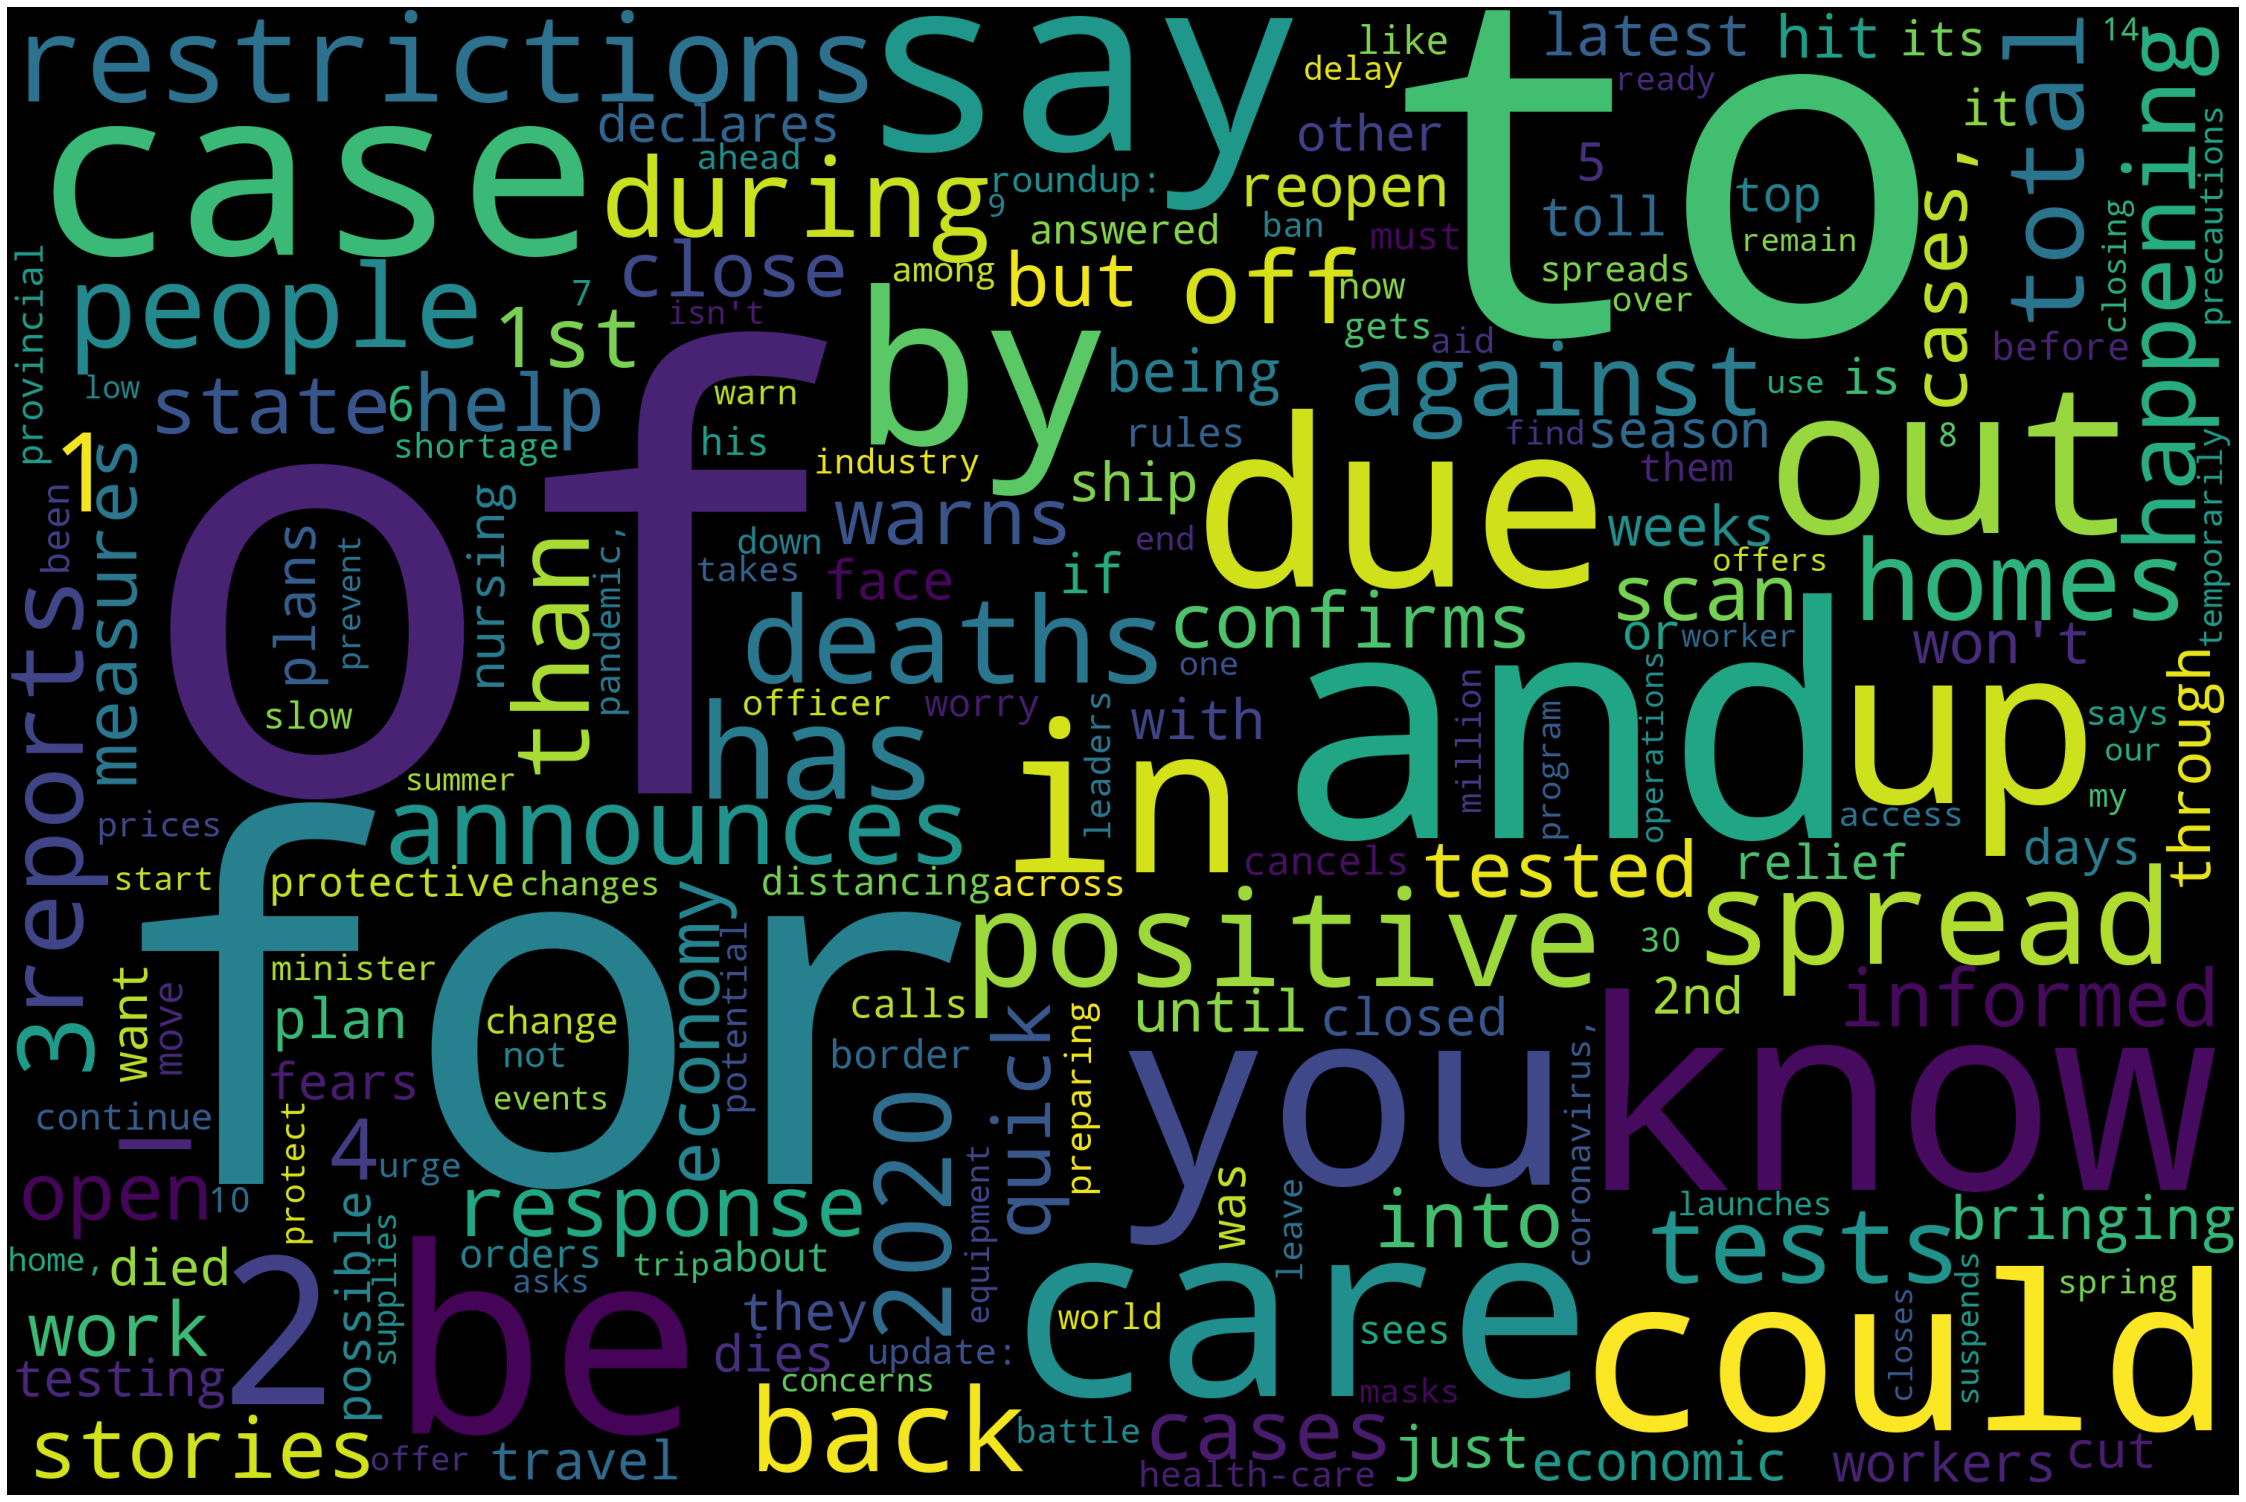

In [145]:
# This can take about a minute
# Retrieve the frequencies from the titles in the dataframe
frequencies = getFrequencyDictForText(' '.join(df["title"]))
# Create a word cloud based on the frequencies from the titles in the dataframe
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
# Plot the word cloud
plot_cloud(word_cloud)

Comme vous pouvez le voir, nous pouvons facilement utiliser la fréquence des termes des titres pour créer un nuage de mots. Ces nuages de mots peuvent être personnalisés pour être dans des arrière-plans d'image, avoir des couleurs personnalisées, etc.

Le nuage de mots ci-dessus contient des termes importants, mais la plupart des termes les plus fréquents ne sont pas très importants (ou sont des symboles/nombres). Ces termes qui apparaissent très fréquemment dans de nombreux types de documents, mais qui ne sont pas importants, sont appelés ***stopwords*** (***mots vides ou inutiles***). Par exemple, les mots *the*, *to* , *is*, *of*, ... sont des mots qui apparaissent extrêmement fréquemment dans le texte, mais qui ne fournissent aucune information significative lors de l'analyse d'un document. Souvent, nous voulons supprimer ces mots vides. Pour cette raison, les bibliothèques de TAL, telles que spaCy, fournissent des méthodes pour détecter quels mots sont des mots vides. Vous trouverez ci-dessous un exemple de la façon dont spaCy peut être utilisé pour déterminer si un mot est un mot vide (basé sur la phrase utilisée dans le premier exemple de la partie 1).

In [146]:
# Call our spaCy object to retrieve the results of running the sentence through the NLP Pipeline
# Note that we can reuse the sp variable without redefining it.
sentence_example_content = sp(sentence_example)
for token in sentence_example_content:
    print("Text: " + str(token.text) + " Is stopword: " + str(token.is_stop))

Text: Government Is stopword: False
Text: guidelines Is stopword: False
Text: in Is stopword: True
Text: Canada Is stopword: False
Text: recommend Is stopword: False
Text: that Is stopword: True
Text: people Is stopword: False
Text: stay Is stopword: False
Text: at Is stopword: True
Text: least Is stopword: True
Text: two Is stopword: True
Text: metres Is stopword: False
Text: away Is stopword: False
Text: from Is stopword: True
Text: others Is stopword: True
Text: as Is stopword: True
Text: part Is stopword: True
Text: of Is stopword: True
Text: physical Is stopword: False
Text: distancing Is stopword: False
Text: measures Is stopword: False
Text: to Is stopword: True
Text: curb Is stopword: False
Text: the Is stopword: True
Text: spread Is stopword: False
Text: of Is stopword: True
Text: COVID-19 Is stopword: False
Text: . Is stopword: False


Ainsi, dans les prochaines questions, vous explorerez différentes manières de manipuler les données de titre avant de générer les fréquences pour créer les nuages de mots. Cela se traduira par différents nuages de mots qui nous permettront de visualiser les termes importants du texte en fonction de certains critères.

Dans les prochaines questions, n'oubliez pas de rappeler l'exemple de la partie 1 qui montre comment spaCy peut être utilisé pour effectuer la lemmatisation et l'exemple ci-dessus qui montre comment spaCy peut être utilisé pour effectuer la détection de mots vides.

**(TO DO) Q7 - 2 points**    

Créez un nuage de mots en fonction de la fréquence du contenu des titres des documents, là où les mots vides sont supprimés (vous devez utiliser spaCy pour trouver les mots vides).

*Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots.*

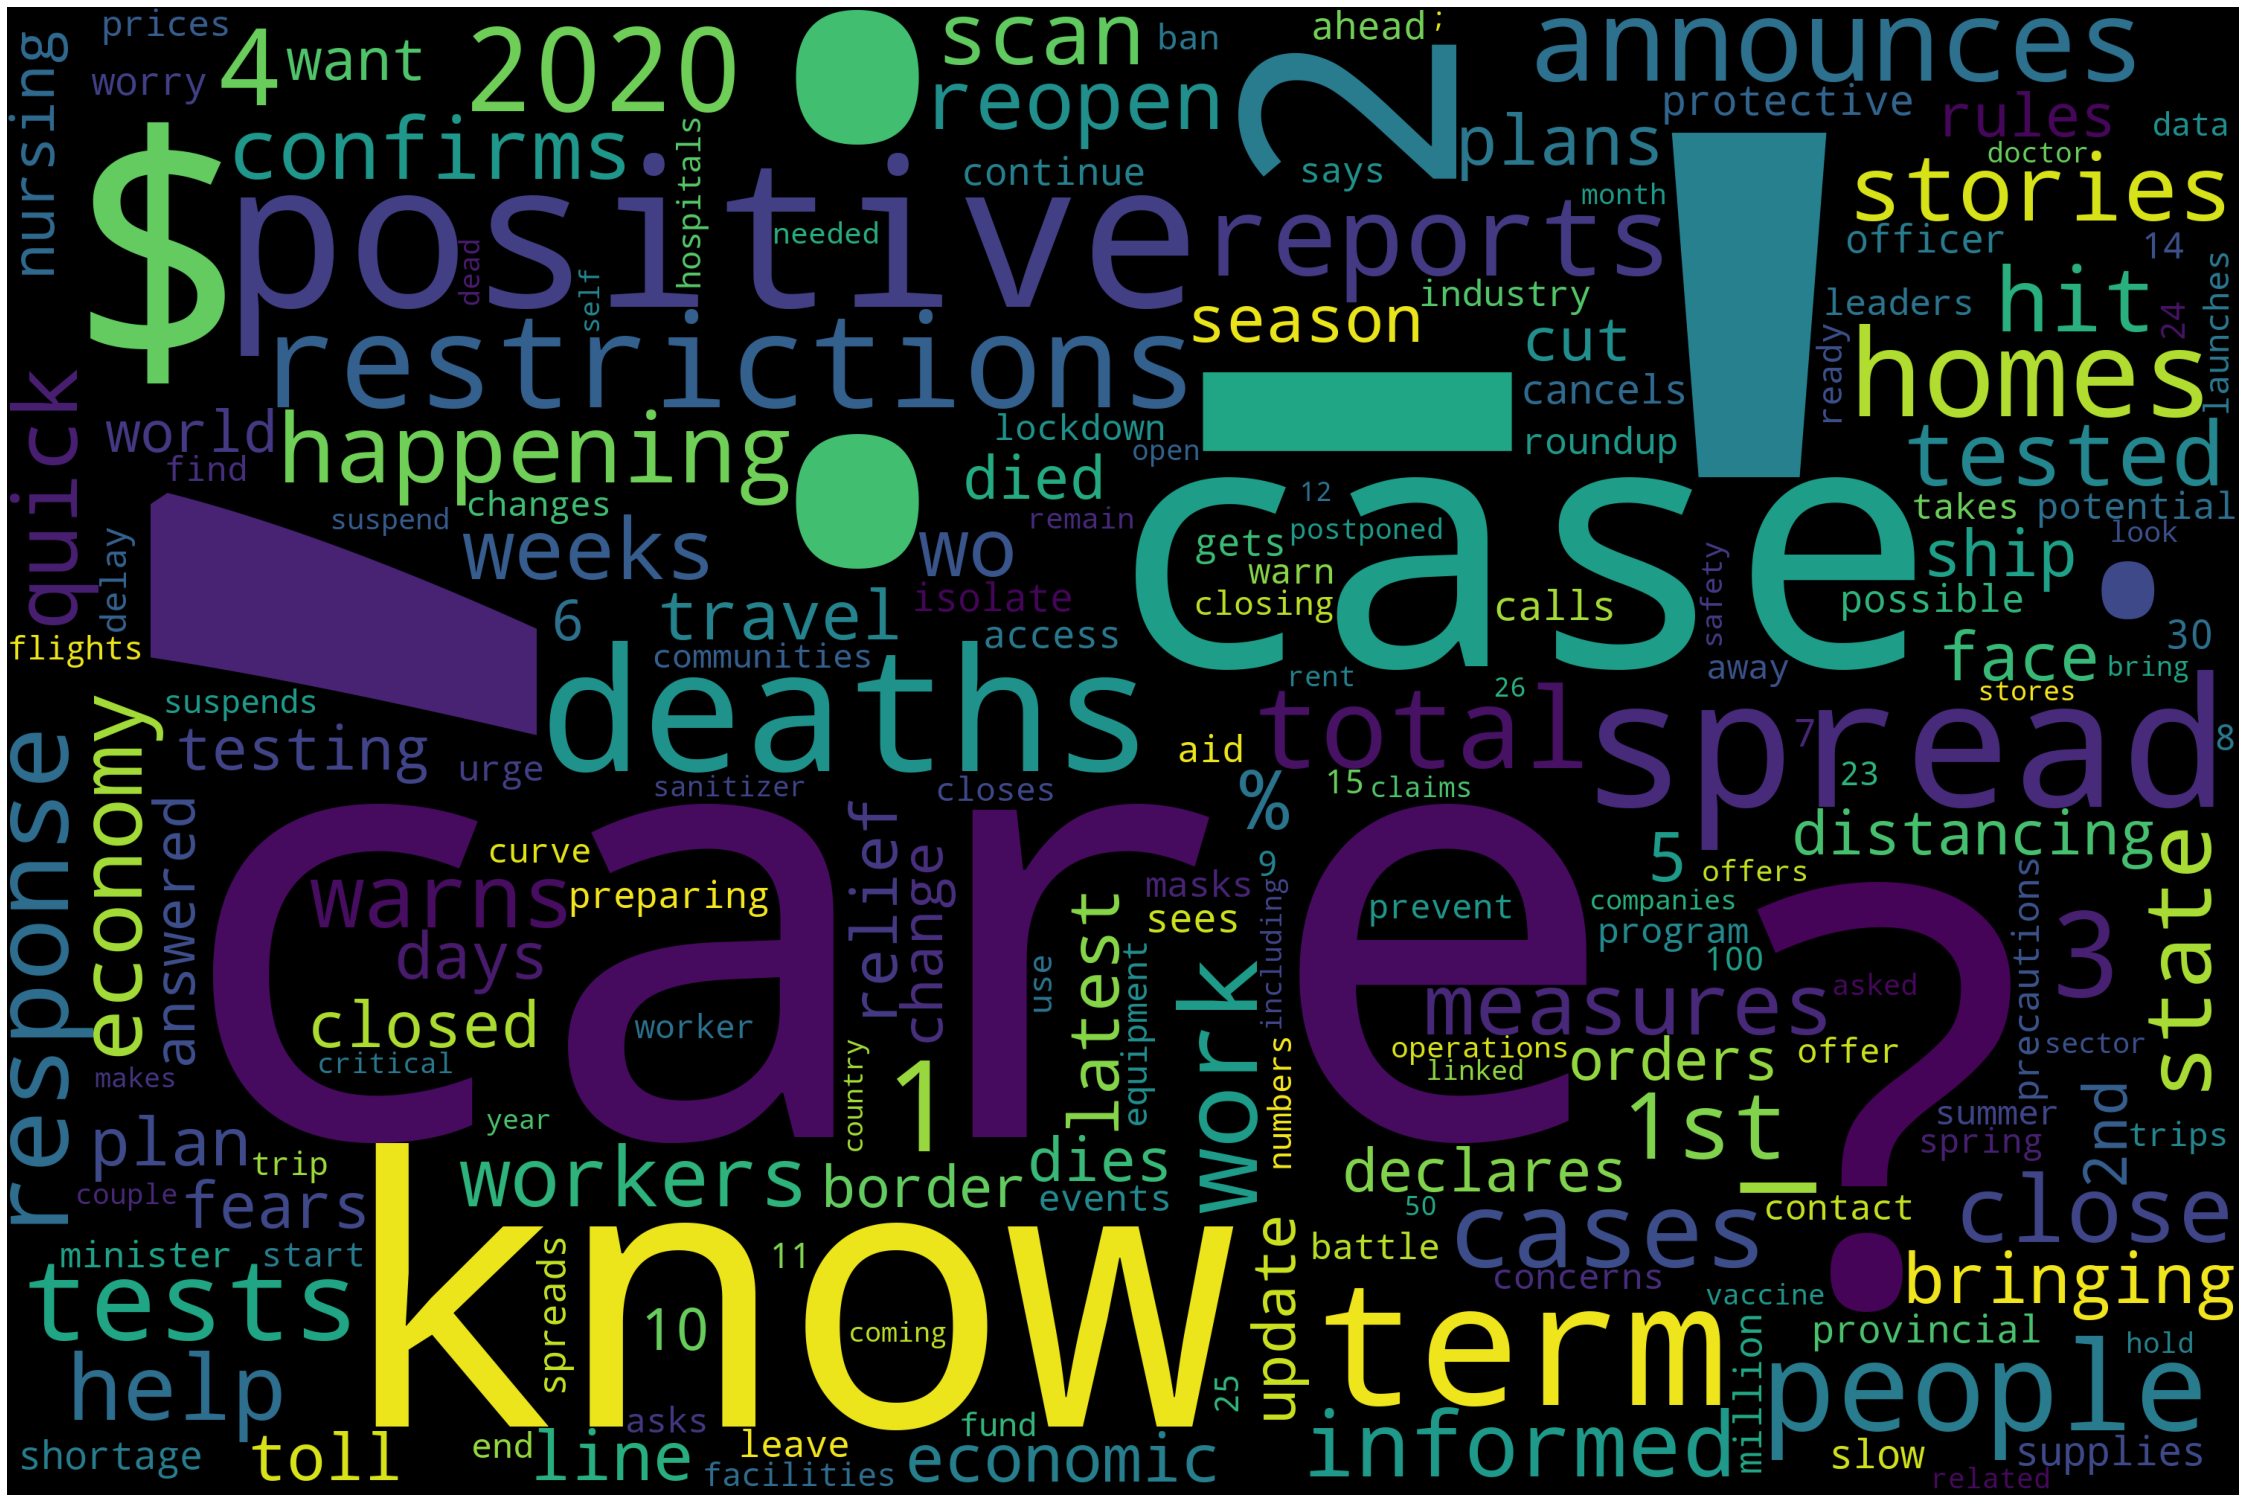

In [147]:
# TO DO
# Get the titles and run them through spaCy
titles = ' '.join(df["title"])
s6 = sp(titles)
# Create a string of with no stopwords
newString = ""
for token in s6:
    if not(token.is_stop) :
        newString = newString + " " + str(token.text)

frequencies = getFrequencyDictForText(newString)
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
plot_cloud(word_cloud)   

# Get the frequencies


# Create the word cloud (with random_state=1)

# Plot the word cloud


**(TO DO) Q8**    

1) Créez un nuage de lemme (un lemme est issu de la lemmatisation d'un token) basé sur la fréquence du contenu des titres des documents avec les mots vides supprimés, où les lemmes proviennent de spaCy.

2) Ensuite, comparez le nuage de mots résultant avec le nuage de mots généré à Q7. Quelle est la différence entre les deux?

*Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots.*

**(TO DO) Q8 (a) - 2 points**    

Créez un nuage de lemmes (un lemme provient de la lemmatisation d'un jeton) en fonction de la fréquence du contenu des titres des documents avec les mots vides supprimés, d'où les lemmes proviennent de spaCy.

* Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots. *

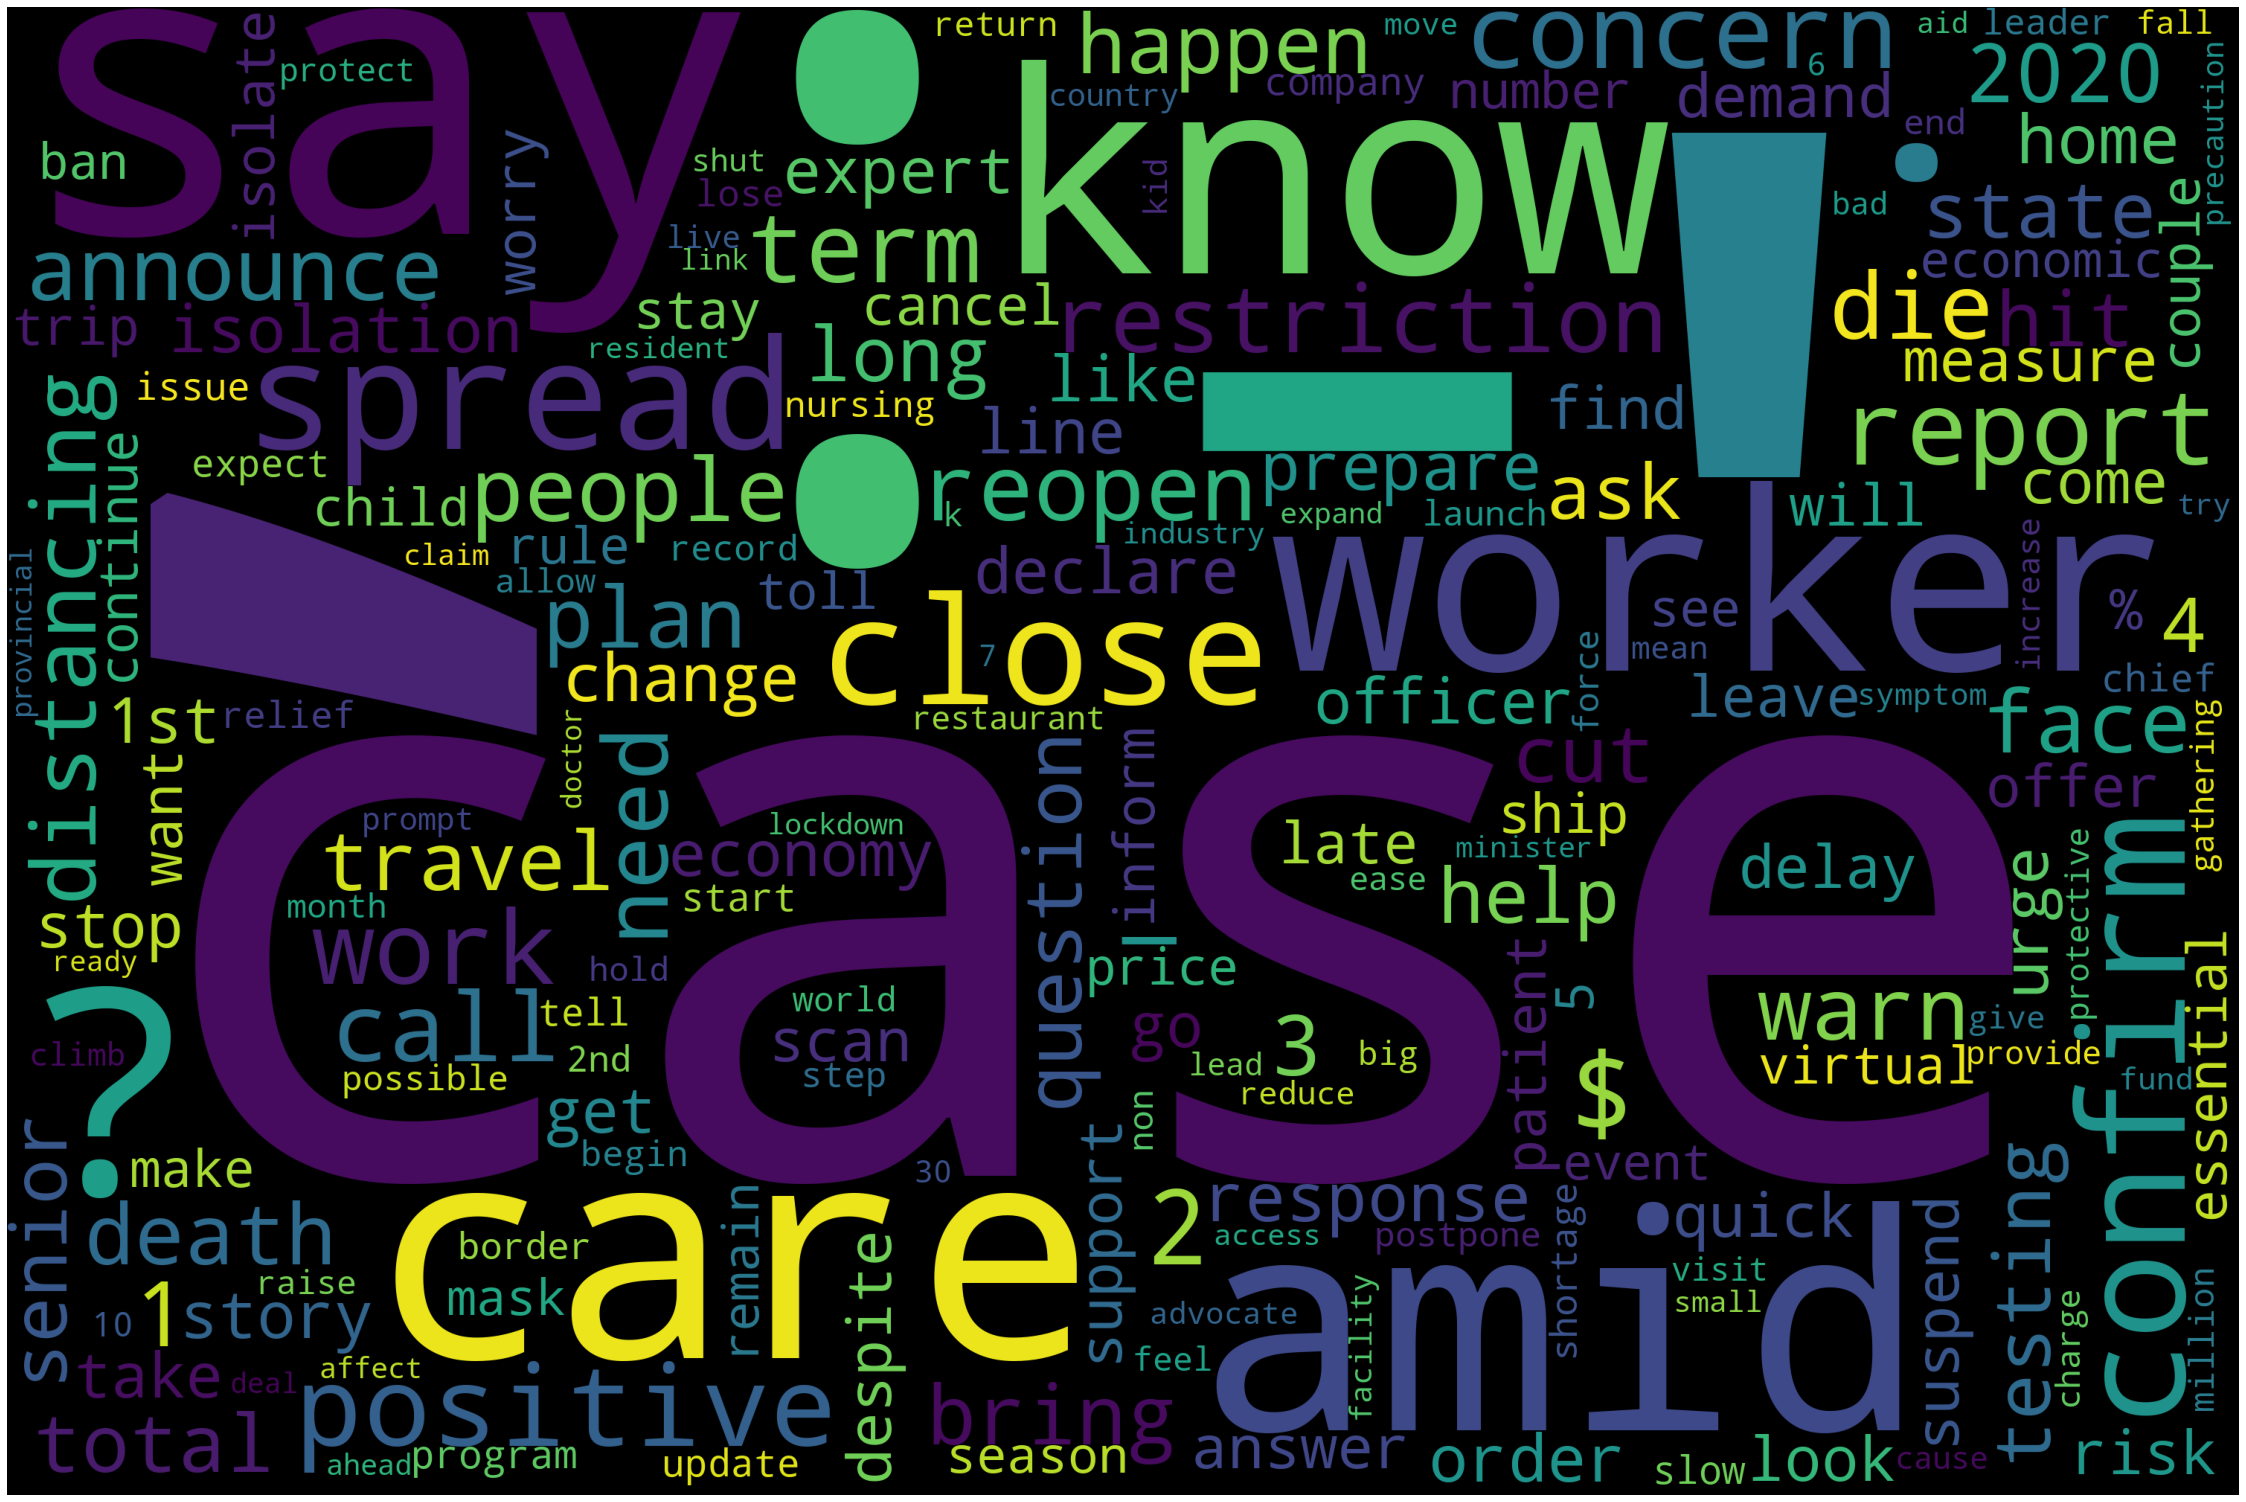

In [148]:
# TO DO
newString= ""
for token in s6:
    if not(token.is_stop) :
        newString = newString + " " + str(token.lemma_)

frequencies = getFrequencyDictForText(newString)
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
plot_cloud(word_cloud)   


**(TO DO) Q8 (b) - 1 point**    

Comparez le nuage de mots résultant avec le nuage de mots généré à Q7. Quelle est la différence entre les deux (donnez un exemple précis)?

Les mots dans ce nuage sont en forme normalisée.C'est à dire les noms sont en forme singulier et les verbes à l'infinitif.
Exemple : announces devient announce


**(TO DO) Q9 - 3 points**    

Construisez un nuage de mots basé sur le contenu des titres des documents où seuls les *adjectifs* sont utilisés ET où tous les mots vides sont supprimés ET où les lemmes sont ajoutés (plutôt que le texte).

*Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots.*

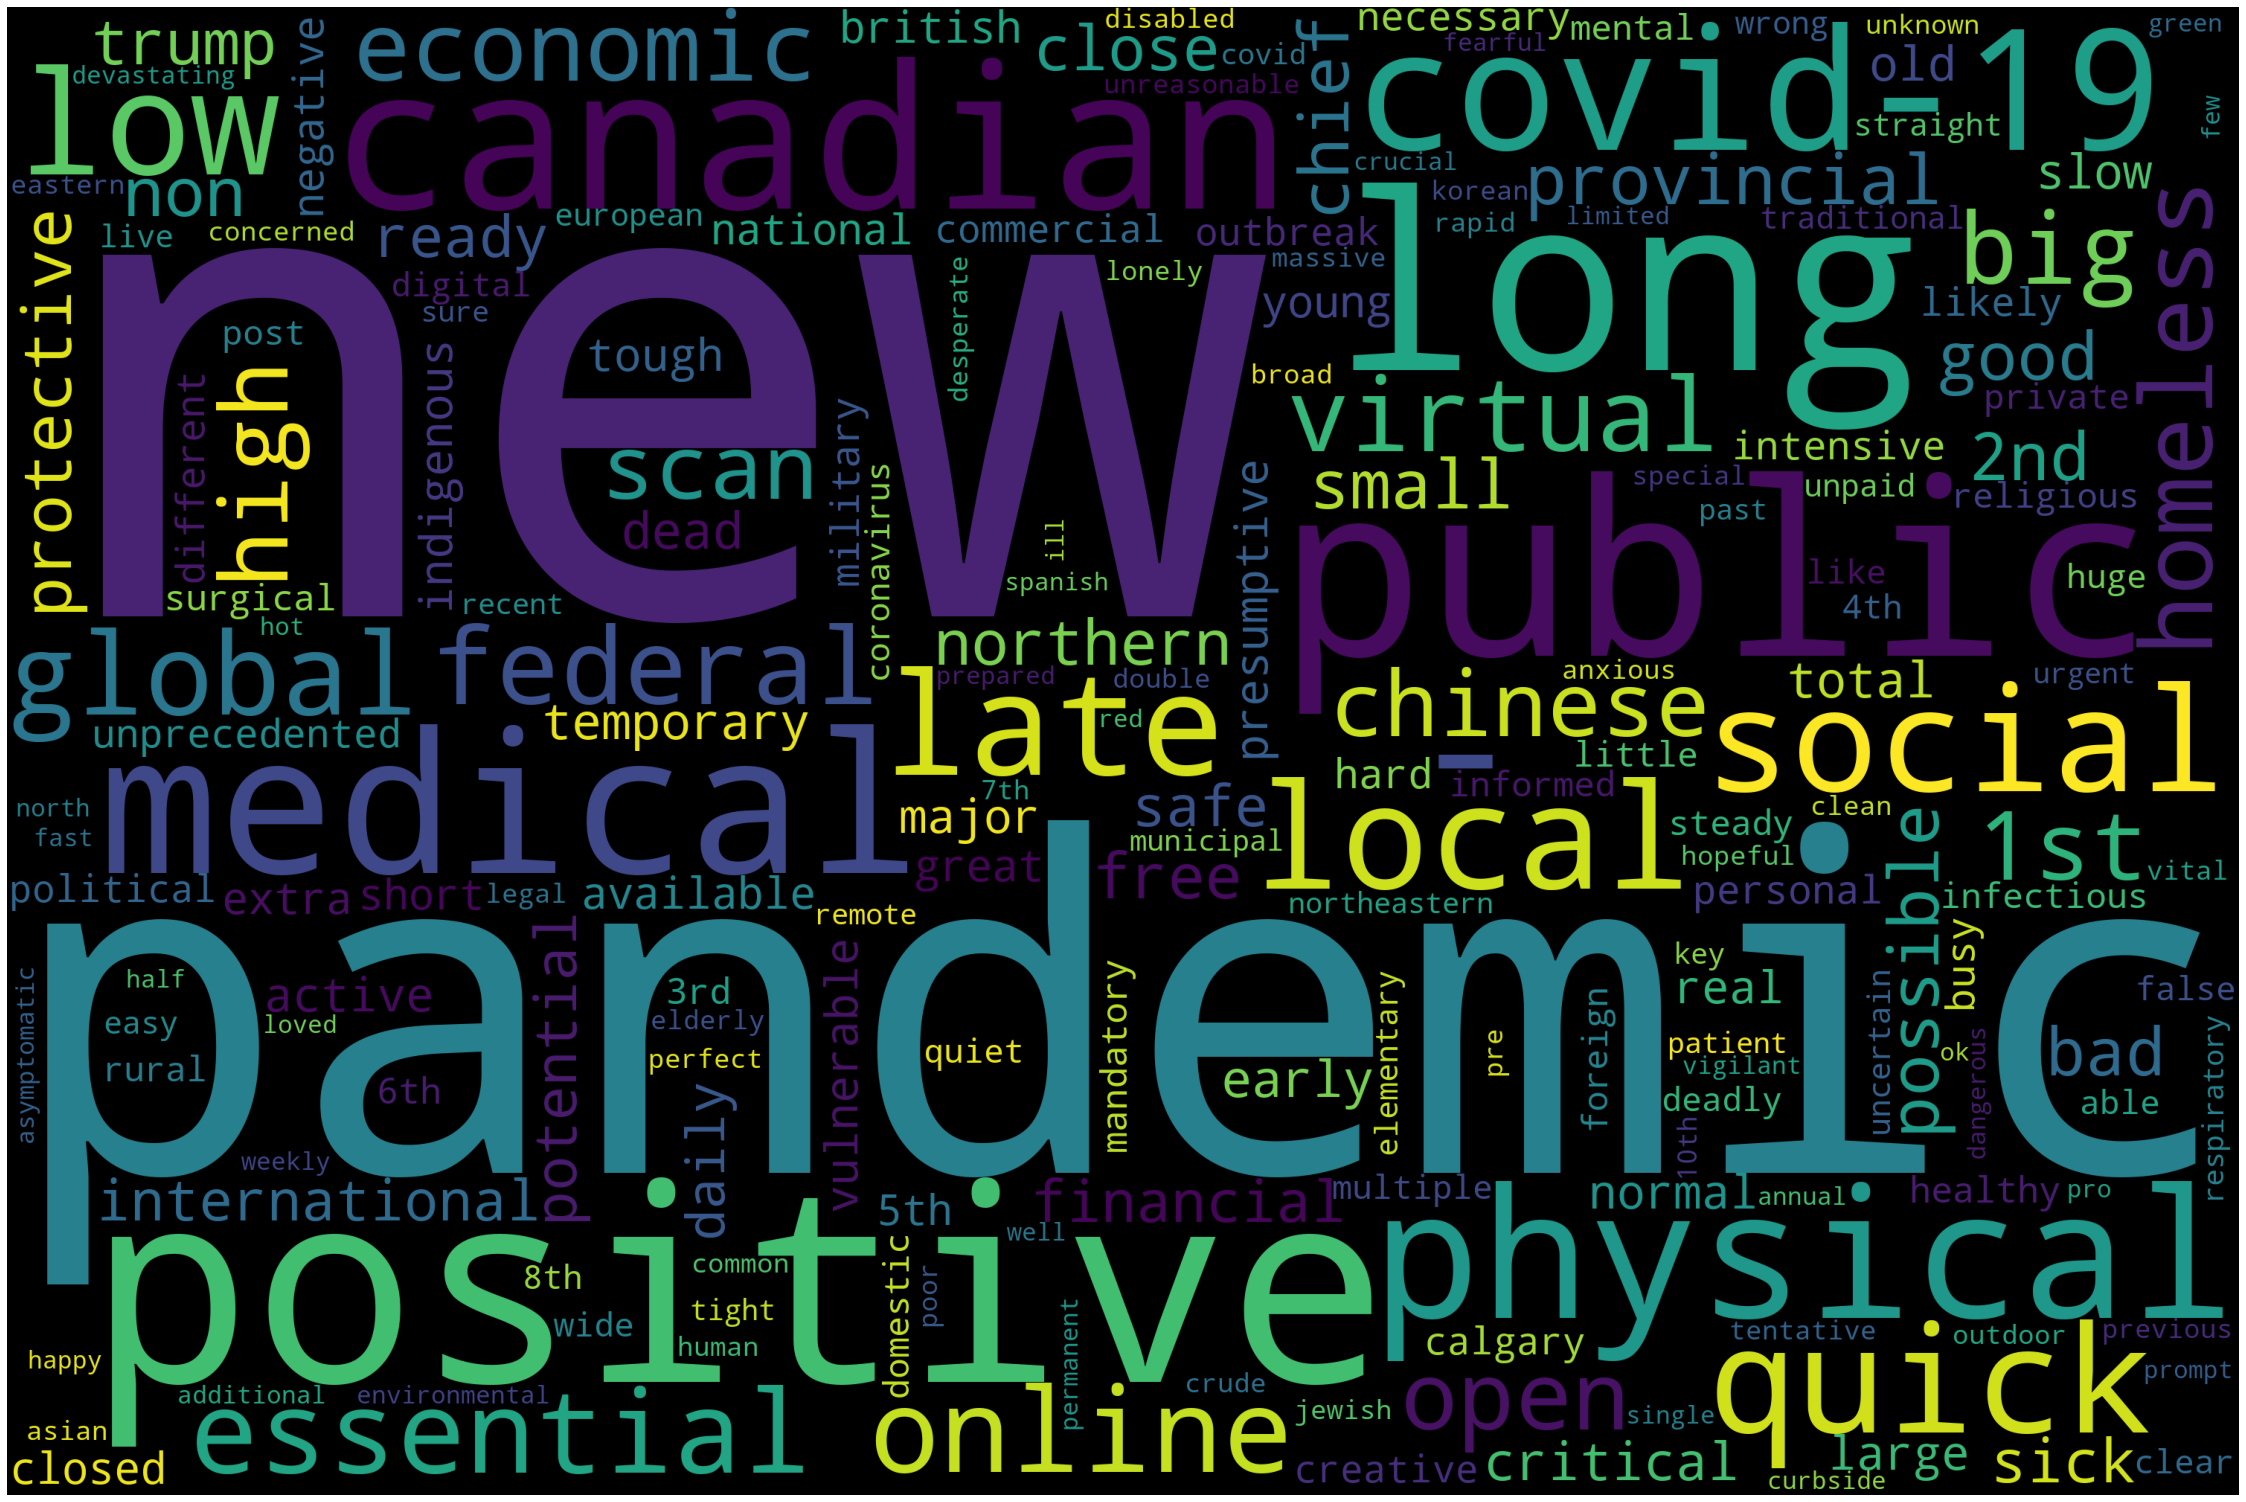

In [149]:
# TO DO (adjectives only, remove stopwords, and add only lemmas)
newString= ""
for token in s6:
    if not(token.is_stop) and token.pos_ == "ADJ":
        newString = newString + " " + str(token.lemma_)

frequencies = getFrequencyDictForText(newString)
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
plot_cloud(word_cloud)   

**(TO DO) Q10 - 2 points**    

En vous basant sur votre propre choix, créez un nuage de mots basé sur le contenu des titres des documents où seuls les *verbes* ou les *noms* sont utilisés (vous en sélectionnez un avec lequel travailler) ET où tous les mots vides sont supprimé ET où les lemmes sont ajoutés (plutôt que le texte).

*Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots.*

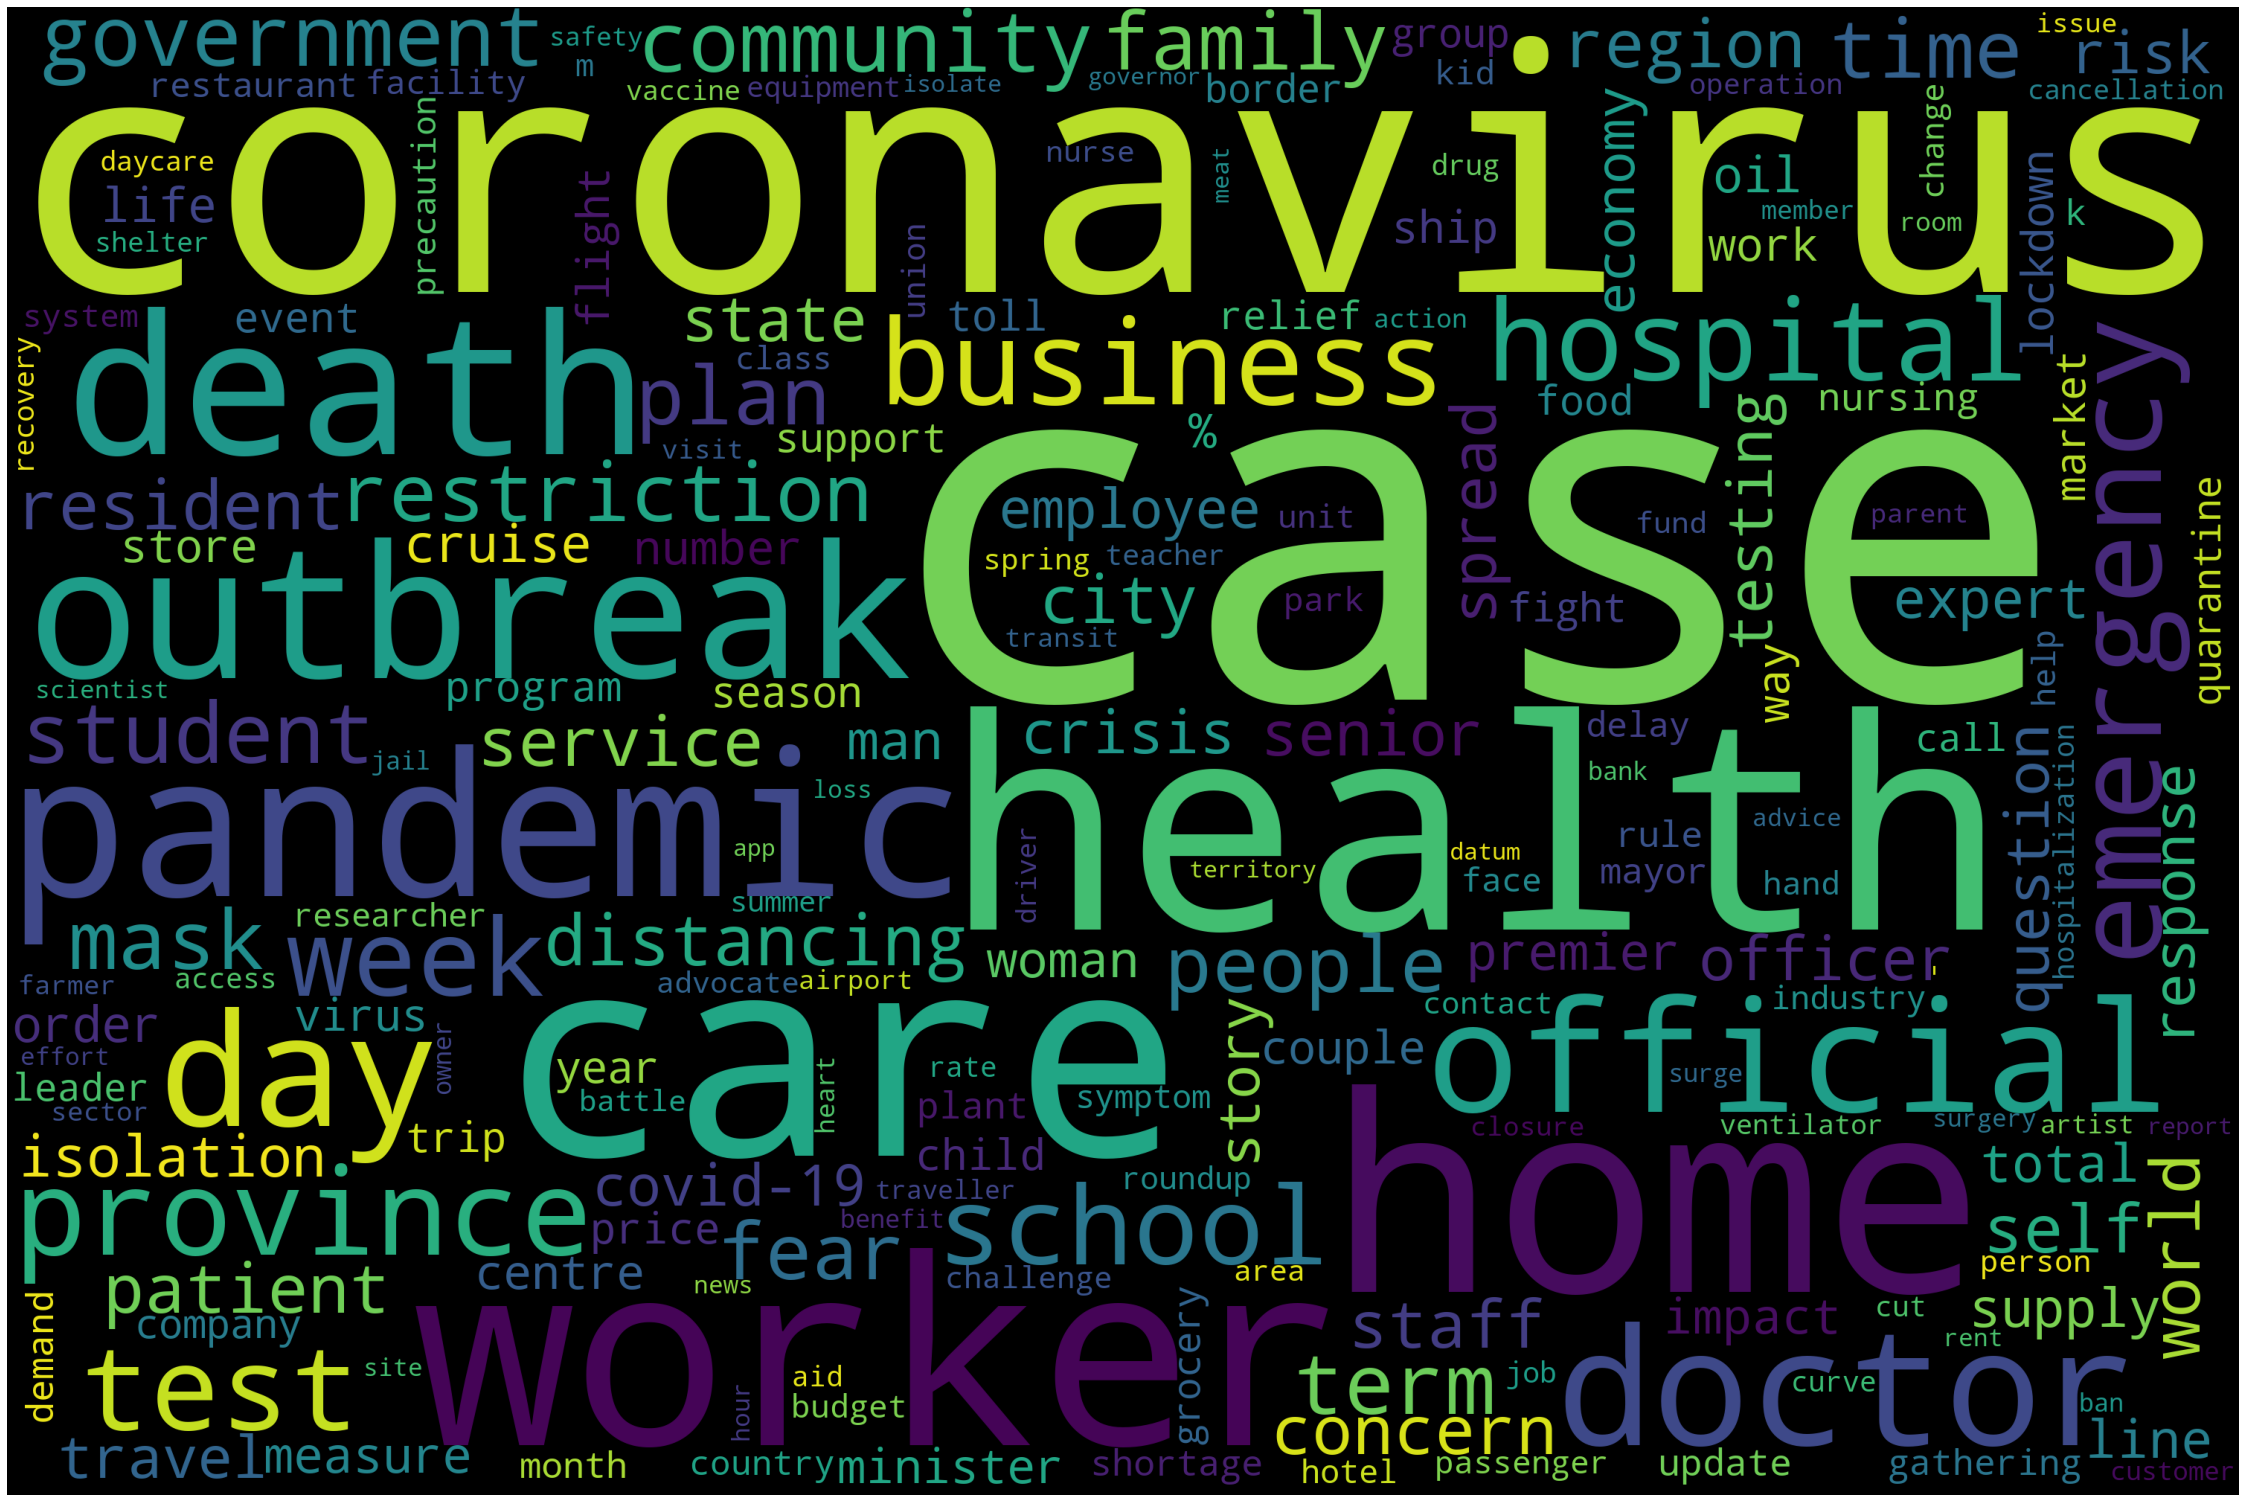

In [150]:
# TO DO (select only one of the POS types above, remove stopwords, and add only lemmas)
newString= ""
for token in s6:
    if not(token.is_stop) and token.pos_ == "NOUN":
        newString = newString + " " + str(token.lemma_)

frequencies = getFrequencyDictForText(newString)
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
plot_cloud(word_cloud)   


Maintenant que tous les nuages de mots ont été créés, vous répondrez à quelques questions pour analyser comment les techniques de TAL qui ont été performantes ont eu un impact sur les nuages de mots générés.

**(TO DO) Q11**   
Répondez aux deux questions suivantes:

1) Comment la suppression des mots vides dans Q7 affecte-t-elle le nuage de mots?

2) Parmi les nuages de mots que vous avez créés, quel nuage de mots pensez-vous a fourni les termes les plus pertinents liés à Covid-19 et pourquoi?

**(TO DO) Q11 (a) - 1 point**    

Comment la suppression des mots vides dans Q7 affecte-t-elle le nuage de mots?

Ça nous évite d’avoir des mots très communs dans la langue anglaise tels que it, in, off, but, is, being, etc... dans le nuage car ils sont pas pertinents pour notre solution. Donc, cela nous donne un nuage qui contient des mots qui apparaissent moins fréquemment que it, in ,... mais qui sont plus importants dans ce contexte-ci.

**(TO DO) Q11 (b) - 1 point**    

Parmi les nuages de mots que vous avez créés, quel nuage de mots pensez-vous a fourni les termes les plus pertinents liés à Covid-19 et pourquoi?

Le dernier nuage crée me semble le plus pertinent car dans un sens, il est moins bruité (il ne contient pas de mots vides ou de chiffres aléatoire). De plus, les noms qui apparaissent sont le plus en lien avec le covid-19. Exemple: isolation, deaths, pandemic,...

***SIGNATURE:***
Mon nom est --Bhavika Sewpal----------.
Mon numéro d'étudiant est ----300089940------.
Je certifie être l'auteur de ce devoir.